In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import copy

In [42]:
df_consol = pd.read_csv("ALL_PLAYER_DATA.csv")

In [43]:
df_consol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7904 entries, 0 to 7903
Data columns (total 47 columns):
Unnamed: 0    7904 non-null int64
Player        7904 non-null object
G             7904 non-null int64
GS            7904 non-null int64
MPG           7904 non-null float64
FG            7904 non-null float64
FGA           7904 non-null float64
FG%           7371 non-null float64
2P            7904 non-null float64
2PA           7904 non-null float64
2P%           7068 non-null float64
3P            7904 non-null float64
3PA           7904 non-null float64
3P%           5763 non-null float64
FT            7904 non-null float64
FTA           7904 non-null float64
FT%           6495 non-null float64
ORB           7904 non-null float64
DRB           7904 non-null float64
TRB           7904 non-null float64
AST           7904 non-null float64
STL           7904 non-null float64
BLK           7904 non-null float64
TOV           7904 non-null float64
PF            7904 non-null float64


In [70]:
df_tconsol = pd.read_csv("NCAA_ALL_COLLEGE_DATA.csv")
df_tconsol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12887 entries, 0 to 12886
Data columns (total 26 columns):
season             12887 non-null object
conf               12887 non-null object
w                  12887 non-null int64
l                  12887 non-null int64
wl                 12887 non-null float64
w_conf             12887 non-null float64
l_conf             12887 non-null float64
wl_conf            12887 non-null float64
srs                12887 non-null float64
sos                12887 non-null float64
pts                12887 non-null float64
pts_vs             12887 non-null float64
ap_pre             12887 non-null int64
ap_high            12887 non-null int64
ap_final           12887 non-null int64
ncaa_tournament    12887 non-null int64
seed               12887 non-null int64
coaches            12887 non-null object
seeded             12887 non-null bool
year               12887 non-null int64
is_ap_pre          12887 non-null bool
is_ap_high         12887 non-null 

In [71]:
df_tconsol.head()

,season,conf,w,l,wl,w_conf,l_conf,wl_conf,srs,sos,...,seed,coaches,seeded,year,is_ap_pre,is_ap_high,is_ap_final,pts_diff,school,pts_total
0,2018-19,Southland,27,6,0.818,14.0,4.0,0.778,-1.28,-8.10,...,15,Joe Golding,True,2019,False,False,False,11.4,abilene-christian,137.6
1,2017-18,Southland,16,16,0.500,8.0,10.0,0.444,-9.14,-6.82,...,20,Joe Golding,False,2018,False,False,False,2.5,abilene-christian,144.9
2,2016-17,Southland,13,16,0.448,7.0,11.0,0.389,-11.86,-7.10,...,20,Joe Golding,False,2017,False,False,False,-2.2,abilene-christian,140.8
3,2015-16,Southland,13,18,0.419,8.0,10.0,0.444,-13.93,-7.53,...,20,Joe Golding,False,2016,False,False,False,-2.0,abilene-christian,144.6
4,2014-15,Southland,10,21,0.323,4.0,14.0,0.222,-17.20,-6.34,...,20,Joe Golding,False,2015,False,False,False,-6.8,abilene-christian,134.2


In [72]:
df_tconsol["season"] = df_tconsol["season"].apply(lambda x: int(x[:2] + x.split("-")[1]))
df_teams = df_tconsol[df_tconsol["season"] >= 2011]
df_teams.head()

,season,conf,w,l,wl,w_conf,l_conf,wl_conf,srs,sos,...,seed,coaches,seeded,year,is_ap_pre,is_ap_high,is_ap_final,pts_diff,school,pts_total
0,2019,Southland,27,6,0.818,14.0,4.0,0.778,-1.28,-8.10,...,15,Joe Golding,True,2019,False,False,False,11.4,abilene-christian,137.6
1,2018,Southland,16,16,0.500,8.0,10.0,0.444,-9.14,-6.82,...,20,Joe Golding,False,2018,False,False,False,2.5,abilene-christian,144.9
2,2017,Southland,13,16,0.448,7.0,11.0,0.389,-11.86,-7.10,...,20,Joe Golding,False,2017,False,False,False,-2.2,abilene-christian,140.8
3,2016,Southland,13,18,0.419,8.0,10.0,0.444,-13.93,-7.53,...,20,Joe Golding,False,2016,False,False,False,-2.0,abilene-christian,144.6
4,2015,Southland,10,21,0.323,4.0,14.0,0.222,-17.20,-6.34,...,20,Joe Golding,False,2015,False,False,False,-6.8,abilene-christian,134.2


In [73]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2289 entries, 0 to 12861
Data columns (total 26 columns):
season             2289 non-null int64
conf               2289 non-null object
w                  2289 non-null int64
l                  2289 non-null int64
wl                 2289 non-null float64
w_conf             2289 non-null float64
l_conf             2289 non-null float64
wl_conf            2289 non-null float64
srs                2289 non-null float64
sos                2289 non-null float64
pts                2289 non-null float64
pts_vs             2289 non-null float64
ap_pre             2289 non-null int64
ap_high            2289 non-null int64
ap_final           2289 non-null int64
ncaa_tournament    2289 non-null int64
seed               2289 non-null int64
coaches            2289 non-null object
seeded             2289 non-null bool
year               2289 non-null int64
is_ap_pre          2289 non-null bool
is_ap_high         2289 non-null bool
is_ap_final        

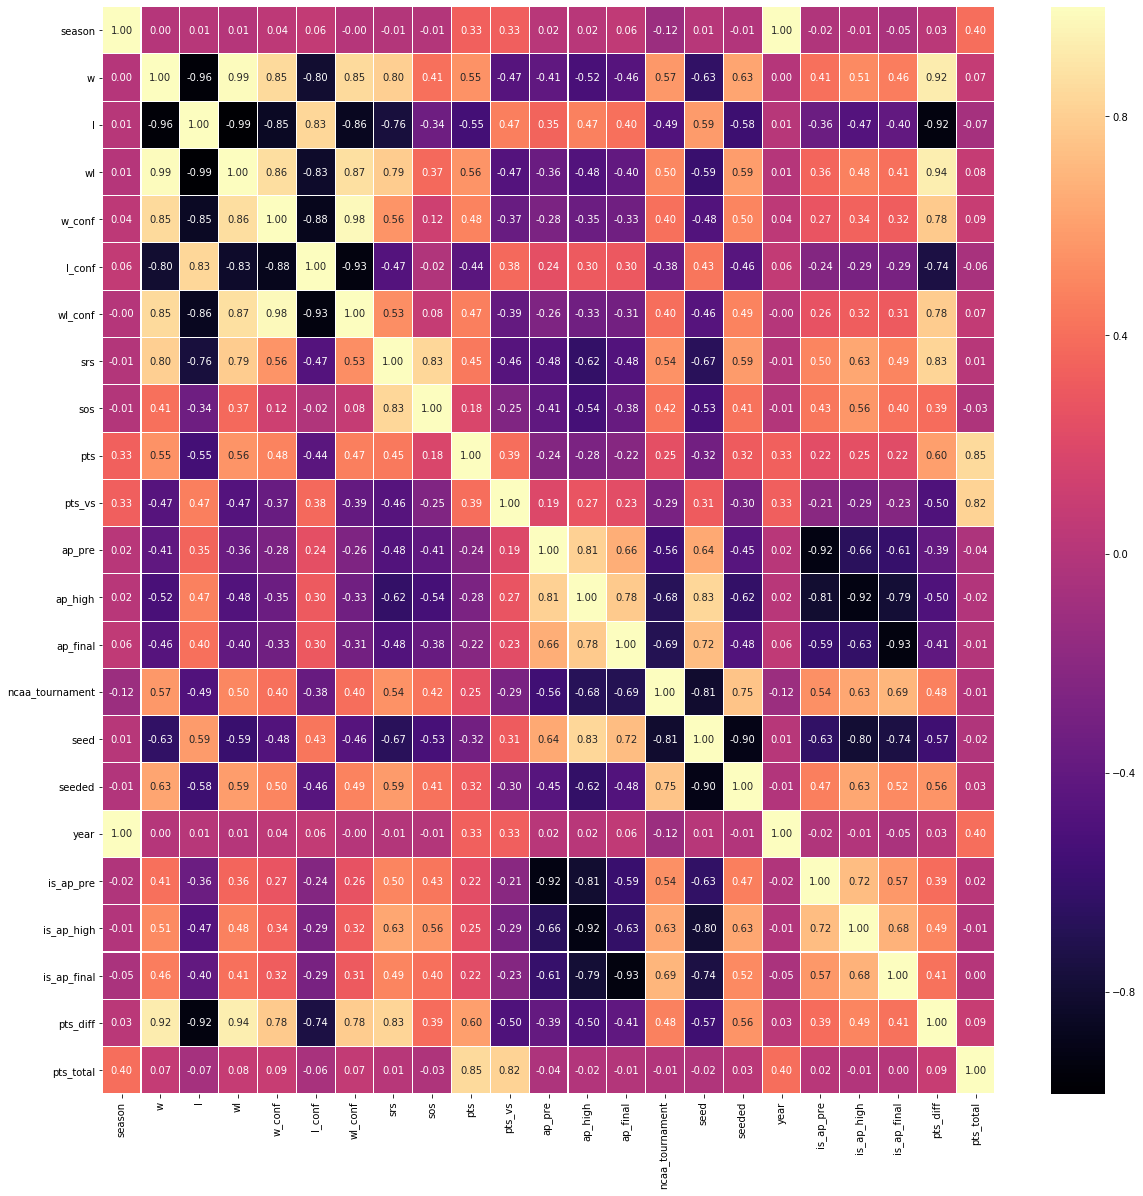

In [76]:
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(df_teams.corr(), ax =ax, annot = True, linewidths=0.05,fmt='.2f',cmap="magma")